## Code von https://apoorvdixit619.medium.com/convex-hull-problem-3358b4cb73d4 

In [ ]:
from tkinter import *

#Store the coordinates
coordinates = []

#Store the solution set
solution = []


#Left click on the Tkinter window to 
#Highlight the point and subsequently
#Store the coordinates of the point
def create_dot(event):
    x = event.x
    y = event.y
    r = 5
    my_canvas.create_oval(x+r, y+r, x-r, y-r,fill='black')
    coordinates.append((x,y))


#Reset using mouse wheel button
def clear(event):
    my_canvas.delete('all')
    coordinates.clear()
    solution.clear()


#Utility function to get which side of the
#line AB the coordinate in question lies on
def get_coordinate_side(A,B,coordinate):
    x1, y1 = A
    x2, y2 = B
    #ax + by + c
    x, y = coordinate
    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2
    f = a*x + b*y + c
    if f < 0:
        return 'right'
    elif f > 0:
        return 'left'
    else:
        return 'on-the-line'


def find_hull(partition,A,B):
    #Return if there are no points in the partition
    if len(partition) == 0:
        return
    else:
        #Get the Orthogonally farthest point C from line AB
        x1, y1 = A
        x2, y2 = B
        a = y2 - y1
        b = x1 - x2
        c = x2*y1 - x1*y2
        farthest_dist = -1
        C = None
        for coordinate in partition:
            x, y = coordinate
            f = abs(a*x + b*y + c)
            if f>farthest_dist:
                f = farthest_dist
                C = coordinate
        x,y = C
        
        #Update the solution set
        solution.remove((A,B))
        solution.append((A,C))
        solution.append((C,B))
        
        #Subdivide the solution
        partition.remove(C)
        ACright = []
        for coordinate in partition:
            coordinate_side = get_coordinate_side(A,C,coordinate)
            if coordinate_side == 'right':
                ACright.append(coordinate)
        CBright = []
        for coordinate in partition:
            coordinate_side = get_coordinate_side(C,B,coordinate)
            if coordinate_side == 'right':
                CBright.append(coordinate)
                
         
        #Divide and Conquer
        find_hull(ACright,A,C)
        find_hull(CBright,C,B)


def convex_hull(event):

    #Sort According to ascending order of X-coordinates
    #followed by ascending order of Y-coordinates (optional)
    sorted_coordinates = sorted(coordinates , key=lambda k: [k[0], k[1]])

    #Leftmost and Rightmost Coordinates A and B
    A = sorted_coordinates[0]
    B = sorted_coordinates[-1]

    #Partition Points on the left and right sides of line AB
    ABright = []
    BAright = []
    for coordinate in sorted_coordinates:
        coordinate_side = get_coordinate_side(A,B,coordinate)
        if coordinate_side == 'right':
            ABright.append(coordinate)
        elif coordinate_side == 'left':
            BAright.append(coordinate)
        else:
            pass

    #Append lines AB and BA to solution
    solution.append((A,B))
    solution.append((B,A))
    
    x1,y1 = A
    x2,y2 = B

    #Divide and Conquer
    find_hull(ABright,A,B)
    find_hull(BAright,B,A)

    #Draw Convex Hull for the final Solution
    for line in solution:
        (x1,y1),(x2,y2) = line
        my_canvas.create_line(x1,y1,x2,y2,width=2,fill='blue')


if __name__ == '__main__':
    my_window = Tk()
    my_canvas = Canvas(my_window, width=500, height=500, background='white')
    #LMB to plant the points on the window
    my_canvas.bind('<Button-1>',create_dot)
    #RMB to get the convex hull
    my_canvas.bind('<Button-3>',convex_hull)
    #MWB to reset everything
    my_canvas.bind('<Button-2>',clear)
    my_canvas.grid(row=0,column=0)
    my_window.mainloop()

## Code von 

In [8]:
import matplotlib.pyplot as plt

def convex_hull_divide_conquer(points):
    # Sort the points by their x-coordinates
    points.sort(key=lambda p: (p[0], p[1]))
    
    def merge_hulls(left_hull, right_hull):
        def cross_product(o, a, b):
            return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
        
        upper_tangent = []
        lower_tangent = []
        
        # Finding the upper tangent
        for p in left_hull:
            while len(upper_tangent) >= 2 and cross_product(upper_tangent[-2], upper_tangent[-1], p) <= 0:
                upper_tangent.pop()
            upper_tangent.append(p)
        
        for p in reversed(right_hull):
            while len(upper_tangent) >= 2 and cross_product(upper_tangent[-2], upper_tangent[-1], p) <= 0:
                upper_tangent.pop()
            upper_tangent.append(p)
        
        # Finding the lower tangent
        for p in left_hull:
            while len(lower_tangent) >= 2 and cross_product(lower_tangent[-2], lower_tangent[-1], p) >= 0:
                lower_tangent.pop()
            lower_tangent.append(p)
        
        for p in reversed(right_hull):
            while len(lower_tangent) >= 2 and cross_product(lower_tangent[-2], lower_tangent[-1], p) >= 0:
                lower_tangent.pop()
            lower_tangent.append(p)
        
        return upper_tangent[:-1] + lower_tangent[:-1]
    
    def divide(points):
        if len(points) <= 3:
            return points
        
        middle = len(points) // 2
        left_half = points[:middle]
        right_half = points[middle:]
        
        left_hull = divide(left_half)
        right_hull = divide(right_half)
        
        return merge_hulls(left_hull, right_hull)
    
    return divide(points)

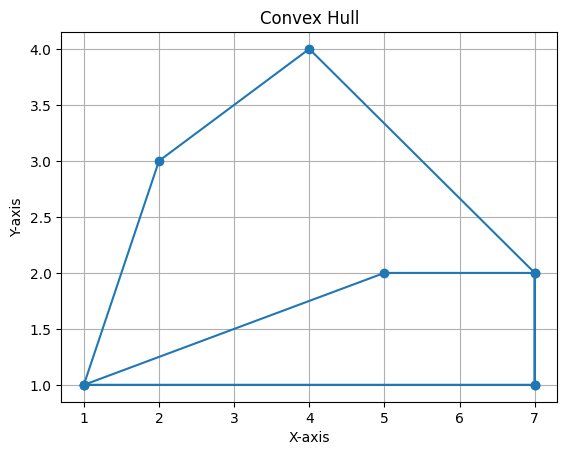

In [9]:
# Example usage:
points = [(1, 1), (2, 3), (3, 2), (4, 4), (5, 1), (6, 3), (7, 2), (5, 2), (7, 1)]
convex_hull = convex_hull_divide_conquer(points)

# Extract the coordinates of the convex hull and convert to lists
hull_x, hull_y = zip(*convex_hull)
hull_x = list(hull_x)
hull_y = list(hull_y)

# Plotting the convex hull lines
plt.plot(hull_x + [hull_x[0]], hull_y + [hull_y[0]], marker='o')
plt.title('Convex Hull')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

## Code von https://www.geeksforgeeks.org/convex-hull-using-divide-and-conquer-algorithm/

In [17]:
# A divide and conquer program to find convex
# hull of a given set of points.
from functools import cmp_to_key

# stores the centre of polygon (It is made
# global because it is used in compare function)
mid = [0, 0]

# determines the quadrant of a point
# (used in compare())
def quad(p):
	if p[0] >= 0 and p[1] >= 0:
		return 1
	if p[0] <= 0 and p[1] >= 0:
		return 2
	if p[0] <= 0 and p[1] <= 0:
		return 3
	return 4

# Checks whether the line is crossing the polygon
def orientation(a, b, c):
	res = (b[1]-a[1]) * (c[0]-b[0]) - (c[1]-b[1]) * (b[0]-a[0])
	if res == 0:
		return 0
	if res > 0:
		return 1
	return -1

# compare function for sorting
def compare(p1, q1):
	p = [p1[0]-mid[0], p1[1]-mid[1]]
	q = [q1[0]-mid[0], q1[1]-mid[1]]
	one = quad(p)
	two = quad(q)

	if one != two:
		if one < two:
			return -1
		return 1
	if p[1]*q[0] < q[1]*p[0]:
		return -1
	return 1

# Finds upper tangent of two polygons 'a' and 'b'
# represented as two vectors.
def merger(a, b):
	# n1 -> number of points in polygon a
	# n2 -> number of points in polygon b
	n1, n2 = len(a), len(b)
	ia, ib = 0, 0

	# ia -> rightmost point of a
	for i in range(1, n1):
		if a[i][0] > a[ia][0]:
			ia = i

	# ib -> leftmost point of b
	for i in range(1, n2):
		if b[i][0] < b[ib][0]:
			ib = i
	# finding the upper tangent
	inda, indb = ia, ib
	done = 0
	while not done:
		done = 1
		while orientation(b[indb], a[inda], a[(inda+1) % n1]) >= 0:
			inda = (inda + 1) % n1

		while orientation(a[inda], b[indb], b[(n2+indb-1) % n2]) <= 0:
			indb = (indb - 1) % n2
			done = 0

	uppera, upperb = inda, indb
	inda, indb = ia, ib
	done = 0
	g = 0
	while not done: # finding the lower tangent
		done = 1
		while orientation(a[inda], b[indb], b[(indb+1) % n2]) >= 0:
			indb = (indb + 1) % n2

		while orientation(b[indb], a[inda], a[(n1+inda-1) % n1]) <= 0:
			inda = (inda - 1) % n1
			done = 0

	ret = []
	lowera, lowerb = inda, indb
	# ret contains the convex hull after merging the two convex hulls
	# with the points sorted in anti-clockwise order
	ind = uppera
	ret.append(a[uppera])
	while ind != lowera:
		ind = (ind+1) % n1
		ret.append(a[ind])

	ind = lowerb
	ret.append(b[lowerb])
	while ind != upperb:
		ind = (ind+1) % n2
		ret.append(b[ind])
	return ret

# Brute force algorithm to find convex hull for a set
# of less than 6 points
def bruteHull(a):
	# Take any pair of points from the set and check
	# whether it is the edge of the convex hull or not.
	# if all the remaining points are on the same side
	# of the line then the line is the edge of convex
	# hull otherwise not
	global mid
	s = set()
	for i in range(len(a)):
		for j in range(i+1, len(a)):
			x1, x2 = a[i][0], a[j][0]
			y1, y2 = a[i][1], a[j][1]
			a1, b1, c1 = y1-y2, x2-x1, x1*y2-y1*x2
			pos, neg = 0, 0
			for k in range(len(a)):
				if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 <= 0):
					neg += 1
				if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 >= 0):
					pos += 1
			if pos == len(a) or neg == len(a):
				s.add(tuple(a[i]))
				s.add(tuple(a[j]))

	ret = []
	for x in s:
		ret.append(list(x))

	# Sorting the points in the anti-clockwise order
	mid = [0, 0]
	n = len(ret)
	for i in range(n):
		mid[0] += ret[i][0]
		mid[1] += ret[i][1]
		ret[i][0] *= n
		ret[i][1] *= n
	ret = sorted(ret, key=cmp_to_key(compare))
	for i in range(n):
		ret[i] = [ret[i][0]/n, ret[i][1]/n]
	return ret

# Returns the convex hull for the given set of points
def divide(a):
	# If the number of points is less than 6 then the
	# function uses the brute algorithm to find the
	# convex hull
	if len(a) < 6:
		return bruteHull(a)

	# left contains the left half points
	# right contains the right half points
	left, right = [], []
	start = int(len(a)/2)
	for i in range(start):
		left.append(a[i])
	for i in range(start, len(a)):
		right.append(a[i])

	# convex hull for the left and right sets
	left_hull = divide(left)
	right_hull = divide(right)

	# merging the convex hulls
	return merger(left_hull, right_hull)

# Driver Code
if __name__ == '__main__':
	a = []
	a.append([0, 0])
	a.append([1, -4])
	a.append([-1, -5])
	a.append([-5, -3])
	a.append([-3, -1])
	a.append([-1, -3])
	a.append([-2, -2])
	a.append([-1, -1])
	a.append([-2, -1])
	a.append([-1, 1])

	n = len(a)
	# sorting the set of points according
	# to the x-coordinate
	a.sort()
	ans = divide(a)

	print('Convex Hull:')
	for x in ans:
		print(int(x[0]), int(x[1]))

	print(ans)


Convex Hull:
-5 -3
-1 -5
1 -4
0 0
-1 1
[[-5.0, -3.0], [-1.0, -5.0], [1.0, -4.0], [0.0, 0.0], [-1.0, 1.0]]


### Ergänzungen

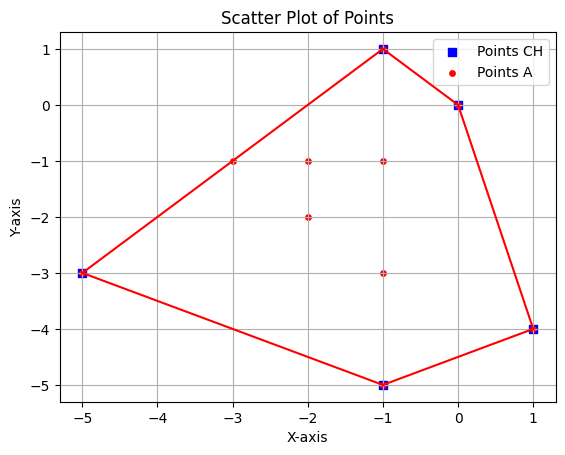

In [30]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from the points
x = [point[0] for point in ans]
y = [point[1] for point in ans]

ax = [point[0] for point in a]
ay = [point[1] for point in a]

# Create a scatter plot
plt.scatter(x, y, c='b', marker='s', label='Points CH')
plt.scatter(ax, ay, s= 15, c='r', marker='o', label='Points A')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Draw lines between the points
for i in range(len(ans) - 1):
    plt.plot([ans[i][0], ans[i + 1][0]], [ans[i][1], ans[i + 1][1]], 'r')

# Connect the last point to the first point to close the loop
plt.plot([ans[-1][0], ans[0][0]], [ans[-1][1], ans[0][1]], 'r')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

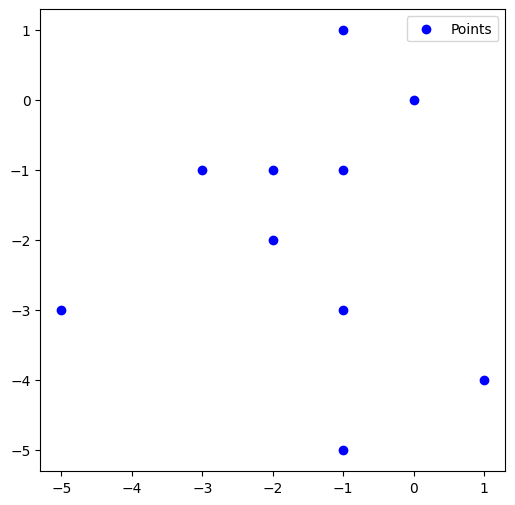